# Фильтр Калмана

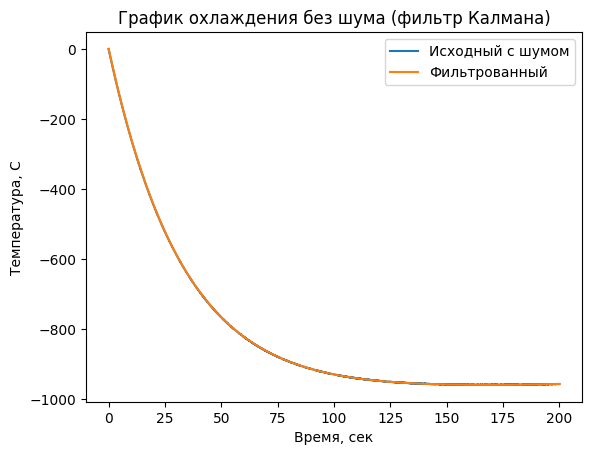

In [1]:
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# генерация данных с шумом
t = np.linspace(0, 200, 20000)
T = 1000 * np.exp(-0.03 * t) - 700 * np.exp(-0.0003 * t) - 300
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, len(t))
T_noisy = T + noise

# применение фильтра Калмана
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=T_noisy[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.03)
filtered_state_means, _ = kf.filter(T_noisy)

# построение графиков
plt.plot(t, T_noisy, label='Исходный с шумом')
plt.plot(t, filtered_state_means, label='Фильтрованный')
plt.title('График охлаждения без шума (фильтр Калмана)')
plt.xlabel('Время, сек')
plt.ylabel('Температура, С')
plt.legend()
plt.show()

# Очистка шума с помощью Wavelets

In [ ]:
import pywt
import numpy as np

def denoise_wavelet(x, wavelet='db4', level=2):
    # Выполняем вейвлет-преобразование сигнала
    coeffs = pywt.wavedec(x, wavelet, level=level)
    
    # Определяем порог для каждого уровня детализации (детализация = последние элементы в coeffs)
    threshold = [np.std(c) * np.sqrt(2 * np.log(len(x))) for c in coeffs[1:]]
    
    # Зануляем все элементы, которые меньше порога
    coeffs = [pywt.threshold(c, t, mode='soft') for c, t in zip(coeffs, threshold)]
    
    # Выполняем обратное вейвлет-преобразование
    y = pywt.waverec(coeffs, wavelet)
    
    # Копируем последние len(x)//2 элементов в начало сигнала, чтобы получить сигнал длиной len(x)
    y[:len(x)//2] = x[:len(x)//2]
    
    return y

t_norm=denoise_wavelet(T_noisy,wavelet='db4', level=2)
plt.plot( t_norm, label='Фильтрованный')